In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import math

In [2]:
# Propagação do Potencial de Ação em Neurônios

In [3]:
np.random.seed(1000)

tmin = 0.0
tmax = 50.0

In [4]:
gK = 3.60
gNa = 12.0
gL = 0.03
Cm = 1.0
VK = -77.0 #(m/V)
VNa = 50.0 #(m/V)
Vl = -54.402 #(m/V)

In [5]:
T = np.linspace(tmin, tmax, 10000)

In [6]:
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

In [7]:
def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

In [8]:
def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)

In [9]:
def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

In [10]:
def Id(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0

In [22]:
def derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy

In [23]:
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])
Vy = odeint(derivatives, Y, T)

In [24]:
Idv = [Id(t) for t in T]

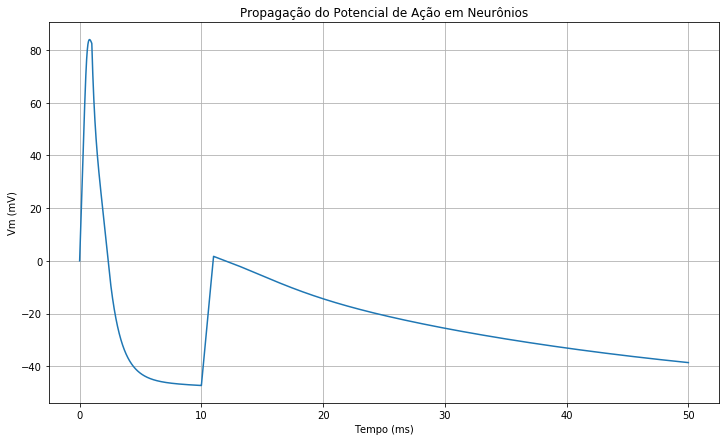

In [26]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, 0])
ax.set_xlabel('Tempo (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Propagação do Potencial de Ação em Neurônios')
plt.grid()